## 1.모듈을 한군대로 모아서 import.

모듈을 한군데로 모아서 import 하는 것이 import 문을 관리하는 데에 편리하다.


In [26]:
#모듈을 한군데로 모아서 import 한다. 그래야 import 문을 관리하는 것이 편리해진다.

import requests
from bs4 import BeautifulSoup
from nltk.tokenize import word_tokenize
from konlpy.tag import Okt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
import matplotlib.pyplot as plt

## 2.import 문들에 대한 설명

import 된 것들이 어떤 기능을 할까? 이에 대해 쉽게 설명한다.


### 1.requests

http 요청을 보내기 위한 라이브러리이다. 주로 웹 페이지에서 데이터를 가져오거나 api와 통신할 때 사용된다.

### 2.BeautifulSoup

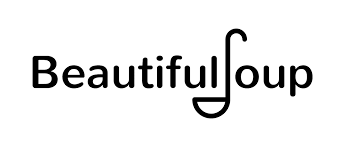

html과 xml 파일을 파싱하고 탐색하기 위한 라이브러리이다.

BeautifulSoup을 통해 가져온 웹 페이지의 html 내용을 파싱해서 데이터 추출에 사용한다.



### 3.konlpy

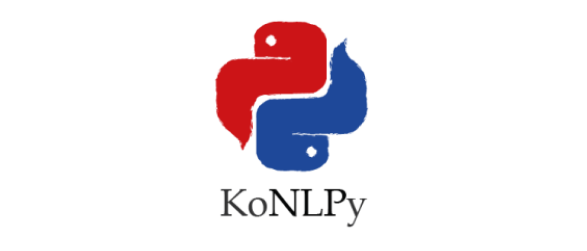

konlpy는 한국어 자연어 처리를 위한 라이브러리이다. okt(open korean text)는 형태소 분석기 중 하나로, 텍스트를 형태소 단위로 나누고 품사의 태깅을 수행한다. 

konlpy는 한국에 텍스트를 전처리할 때 사용한다. okt.morphs(text)를 통해 텍스트를 형태소 단위로 나누는 데 사용된다.

### 4.tensorflow

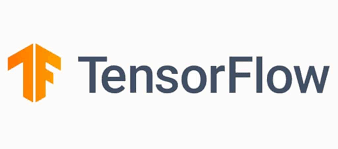

tensorflow는 구글에서 만든 딥러닝 프로그램을 쉽게 구현할 수 있도록 기능을 제공하는 라이브러리이다.
텐서플로우 자체는 c++에서 구현이 되나, 파이썬, 자바 등 다양한 언어로 지원이 된다. 그 중에서 최우선으로 지원되는 것이 파이썬이다.

### 5.keras

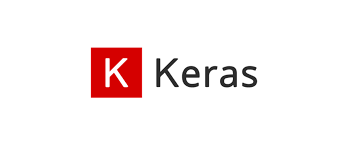


tensorflow의 api중 하나이다. 딥러닝 모델을 구축하고 학습시키기 위한 고수준 api이다.
Sequential은 순차적인 모델을 정의할 때 사용되고, lstm은 장단기 메모리 네트워크, Dense는 완전 연결 층을 정의할 때 사용된다.
Tokenizer는 텍스트 데이터를 토큰화(토큰이라고 불리는 단위로 나누는 작업)하고 시퀀스로 변환하는데 사용된다.
pad_sequences는 시퀀스의 길이를 맞추기 위해 패딩(길이를 맞추기 위해 남은 부분을 0으로 추가하는 것)을 추가하는 데 사용된다.


### 6.Scikit-learn

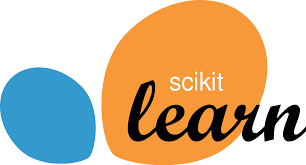

한글로는 사이킷런이라고도 한다. 

사이킷런은 파이썬을 대표하는 머신러닝 분석을 할 때 유용하게 사용할 수 있는 라이브러리이다.
여러가지 머신러닝 모듈로 구성되어 있다.
초심자가 기계학습을 배우기 시작할 때 적합한 라이브러리라고 할 수 있다.

이번 프로젝트에는 TfidfVectorizer,cosine_similarity 등의 모듈을 사용하였다.


### 7.TfidfVectorizer

Scikit-learn의 TF-IDF(Term Frequency-Inverse Document Frequency) 벡터화 도구이다.
텍스트를 TF-IDF 벡터로 변환해서 머신러닝 모델의 입력으로 사용할 때 사용된다.

### 8.TF-IDF

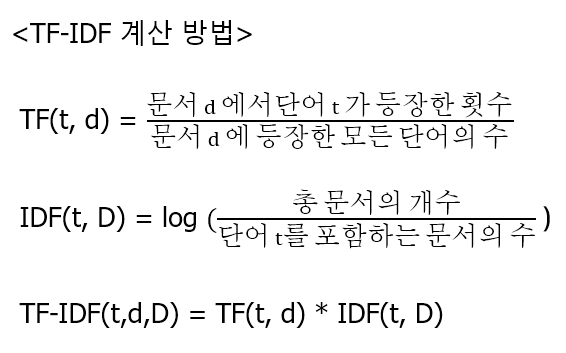

문서에서 한 단어가 얼마나 중요한지를 수치적으로 나타낸 가중치이다.
자연어처리에서 정보수집, 텍스트 마이닝 및 유저 모델링의 가중치 계산에 자주 사용된다.
값은 단어가 많이 등장할수록 커진다.
검색 엔진에서 관련성 순위를 매길 때 자주 이용된다.

### 9.cosine_similarity

Scikit-learn의 유사도 측정 도구이다. 두 벡터간의 코사인 유사도를 계산한다.
이는 질문과 데이터 간의 유사도를 계산할 때 사용된다.

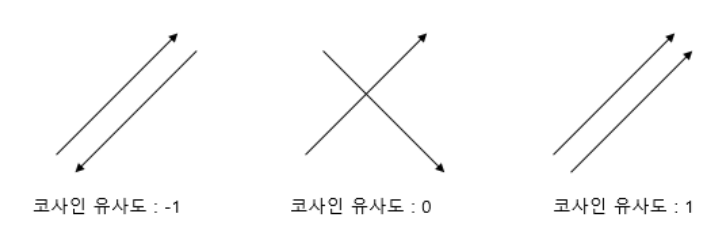

벡터 방향이 비슷할 수록(1에 가까울 수록) 두 벡터는 서로 유사하며, 벡터 방향이 90도일때는 두 벡터간의 관련성이 없다.
벡터 방향이 반대가 될수록(-1에 가까워질수록) 두 벡터는 반대 관계를 보인다.

코사인 유사도를 구하는 식은 내적의 결과를 정규화한 것이라고 할 수 있다.

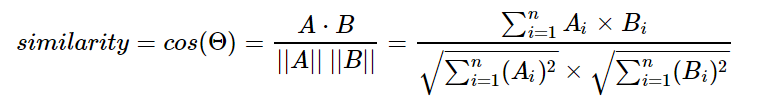

from sklearn.metrics.pairwise import cosine_similarity을 통해 복합한 함수를 구현할 필요 없이 두 문장간의 코사인 유사도를 구할 수 있다.



### 10.numpy


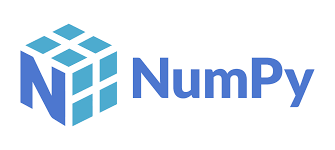


numpy는 대규모 다차원 배열 및 행렬 연산을 위한 패키지이다. 
수학 함수와 함께 제공이 되며 과학 계산에 사용된다.
벡터 연산,배열 생성 및 조작에 사용된다.

### 11.matplotlib

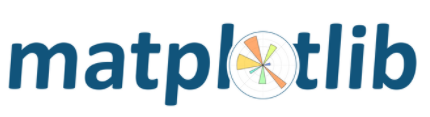

파이썬에서 데이터를 시각화해주는 라이브러리이다.

주로 matplotlib의 pyplot을 사용한다.


## 3.BeautifulSoup를 이용해서 웹 크롤링


In [4]:
url='https://theonlyone.tistory.com/entry/%EC%84%B8%EC%A2%85%EB%8C%80%EC%99%95%EC%9D%98-%EC%97%85%EC%A0%81%EA%B3%BC-%EC%99%B8%EA%B5%90#:~:text=%EC%84%B8%EC%A2%85%EB%8C%80%EC%99%95%C2%A0%EC%8B%9C%EB%8C%80%EC%9D%98%C2%A0%EC%99%B8%EA%B5%90%EA%B4%80%EA%B3%84%EB%8A%94%C2%A0%EB%8B%A4%EC%96%91%ED%95%9C%C2%A0%EC%9A%94%EC%9D%B8%EC%97%90%C2%A0%EB%94%B0%EB%9D%BC%C2%A0%EB%B3%80%ED%99%94%ED%96%88%EC%A7%80%EB%A7%8C%2C%C2%A0%EB%8C%80%EC%B2%B4%EB%A1%9C%C2%A0%EC%95%88%EC%A0%95%EC%A0%81%EC%9D%B4%EA%B3%A0%C2%A0%ED%99%9C%EB%B0%9C%ED%95%9C%C2%A0%EC%99%B8%EA%B5%90%C2%A0%ED%99%9C%EB%8F%99%EC%9D%B4%C2%A0%EC%9D%B4%EB%A3%A8%EC%96%B4%EC%A1%8C%EC%8A%B5%EB%8B%88%EB%8B%A4,%EC%A0%95%EC%B9%98%EC%A0%81%EC%9D%B8%C2%A0%EC%95%88%EC%A0%95%3A%C2%A0%EC%84%B8%EC%A2%85%EB%8C%80%EC%99%95%EC%9D%98%C2%A0%ED%86%B5%EC%B9%98%EB%8A%94%C2%A0%EC%9D%BC%EC%A0%95%ED%95%9C%C2%A0%EC%A0%95%EC%B9%98%EC%A0%81%EC%9D%B8%C2%A0%EC%95%88'
response = requests.get(url)
response.encoding = 'utf-8' #utf-8로 특정화한다.

#BeautifulSoup을 사용하여 HTML 파싱
soup=BeautifulSoup(response.text,'html.parser')

# 텍스트 추출
text = soup.get_text()

# 결과 출력
print(text)














































































세종대왕의 업적과 외교




















본문 바로가기






              
              
                the only one
              
            



블로그 내 검색

검색





관리
글쓰기
로그인
로그아웃



메뉴



홈
태그
방명록










역사
세종대왕의 업적과 외교

by 뮤콥
2024. 1. 30.








 
세종대왕은 조선시대 한국의 제4대 군주로, 조선의 중추적인 왕 중 하나로 인정받고 있습니다. 그의 통치는 한국 역사상 가장 영향력 있는 것 중 하나로 여겨지며, 세종 대왕은 문화, 과학, 정치, 교육 등 여러 분야에서 혁신적인 업적을 이루었습니다. 한글 창제: 세종 대왕은 한글을 창제하여 한글 문자를 만들었습니다. 이는 한국의 문자 체계를 혁명적으로 변화시켜, 많은 사람들에게 글쓰기와 읽기를 쉽게 접근할 수 있게 했습니다. 과학기술 발전: 세종 대왕은 조선의 과학기술 발전을 촉진하기 위해 노력했습니다. 천문학, 의학, 농업 등 다양한 분야에서 연구를 진행하고 기술을 발전시켰습니다. 정치혁신: 세종 대왕은 조선의 행정 체계를 혁신하여 국가의 효율성을 높였습니다. 특히 세종 대왕은 양인을 인정하고, 서민들의 권리를 보호하는 등 사회적으로 진보적인 정책을 시행했습니다. 교육정책: 세종 대왕은 교육을 중요시하여 사대부의 특권을 제한하고 서민들의 교육을 촉진했습니다. 또한 신진 문인들을 후원하여 문화 예술의 발전에 기여했습니다. 그의 통치는 한국의 역사와 문화에 큰 영향을 끼쳤습니다. 그의 업적은 현재도 한국 사회에서 크게 존경받고 있으며, 그의 이름은 한국의 국민들에게 특별한 의미를 지니고 있습니다. 세종대왕(1397년 ~ 1450년)은 조선시대 한국의 제4대 군주로, 그의 유년기에 대한 자세한 기록은

In [5]:
url='https://encykorea.aks.ac.kr/Article/E0029857'
response = requests.get(url)
response.encoding = 'utf-8' #utf-8로 특정화한다.

#BeautifulSoup을 사용하여 HTML 파싱
soup=BeautifulSoup(response.text,'html.parser')

# 텍스트 추출
text1 = soup.get_text()

# 결과 출력
print(text1)


















세종(世宗) - 한국민족문화대백과사전

























본문 바로가기







의견&문의
이용 안내



































분야



경제·산업

경제
교통
산업
통신



과학

과학기술
동물
식물
의약학



교육


문학

고전산문
고전시가
구비문학
한문학
현대문학



사회

가족
사회구조
촌락



생활

민속·인류
식생활
의생활
주생활



언론·출판

언론·방송
출판



언어

언어·문자



역사

선사문화
고대사
고려시대사
조선시대사
근대사
현대사



예술·체육

건축
공예
국악
대중음악
무용
서예
연극
영화
조각
체육
현대음악
회화



정치·법제

국방
법제·행정
외교
정치



종교·철학

개신교
대종교
도교
민간신앙
불교
신종교
원불교
유교
천도교
천주교



지리

인문지리
자연지리



북한




유형


인물


지명


개념


유물


단체


작품


문헌


사건


물품


제도


놀이


유적


의식/행사


동/식물





전체메뉴




















세종

(世宗)













목차


메뉴 접기




정의
개설
세종의 즉위 과정
세종의 업적

1. 유교정치의 기틀 마련
2. 편찬사업의 융성
3. 훈민정음의 창제
4. 과학기술의 발전과 기술서적의 편찬
5. 법전의 정비
6. 불교에 대한 시책


세종 치세의 역사적 의의
상훈과 추모
참고문헌


관련 정보


관련 항목
관련 미디어













글자 크기





의견 제시






URL 복사



페이스북 공유



트위터 공유







						세종
(世宗)					









									세종대왕 동상
								





조선시대사

인물


조선의 제4대(재위: 1418년~1450년) 왕.




이칭


자
원정(元正)


시호
장헌(莊憲)



인물/전통 인물


성별

남성							

## 4.크롤링한 데이터의 비문 등을 제거하고, 이를 txt로 저장한 뒤 파일을 하나로 합침.

In [6]:
#파일 읽기 함수

def read_file(file_path):
    with open(file_path,"r",encoding="utf-8") as file: #읽기 모드로 파일을 open하고, 한글 인코딩(utf-8)을 빼먹지 않는다.
        return file.read()

#2개의 파일 경로
file1="세종-한국민족문화대백과사전.txt"
file2="세종대왕의 업적과 외교.txt"

#파일 내용 읽기

data1 = read_file(file1)
data2 = read_file(file2)

#2개의 파일을 하나로 합친다.
total_data = data1 + "\n" + data2

#출력을 통해 2개의 텍스트 파일이 잘 합쳐졌는지 확인한다.
print(total_data)



세종의 즉위 과정:원래 태종의 뒤를 이을 왕세자는 양녕대군(讓寧大君)이었다. 그러나 양녕대군이 개와 매[鷹]에 관계된 사건을 비롯해, 세자로서의 품위를 손상시킨 일련의 행동과 사건들로 인해 태종의 선위에 대한 마음이 동요되었다. 그래서 태종은 자신이 애써 이룩한 정치적 안정과 왕권을 이어받아 훌륭한 정치를 펴기에 양녕대군이 적합하지 못하다고 판단하였다. 태종의 마음이 이미 세자 양녕대군에게서 떠난 것을 알게 된 신료(臣僚)들은 그를 폐위할 것을 청하는 소(疏)를 올려 양녕대군을 폐하고 충녕대군을 왕세자로 삼기에 이르렀다.

이 때 태종에게는 왕후 민씨 소생으로 양녕 · 효령(孝寧) · 충녕 등 세 대군이 있었고, 양녕대군에게도 두 아들이 있었다. 따라서 그를 폐하고 새로이 세자를 세우는 일은 매우 어려운 일이었기 때문에 세자 폐립에 관해 의론이 분분하였다. 그러나 태종의 마음은 이미 셋째아들인 충녕대군에게 쏠려 있었다. 1418년 6월에 태종은 “충녕대군은 천성이 총민하고, 또 학문에 독실하며 정치하는 방법 등도 잘 안다.”라고 해 택현(擇賢)주17의 명분을 주어 세자로 책봉하기로 결정하였다.

이처럼 충녕대군에 대한 세자책봉은 태종의 뜻에 따라 극적으로 이루어졌다. 물론, 대부분의 신하들도 이를 환영하였다. 두 달 뒤인 1418년 8월 10일 태종의 선위를 이어받아 세자 충녕대군이 왕위에 올랐으니 이 사람이 세종이다.



유교정치의 기틀 마련:세종대는 우리 민족의 역사에서 가장 훌륭한 유교정치, 찬란한 문화가 이룩된 시대였다. 이 시기에는 정치적으로 안정되어 정치 · 경제 · 사회 · 문화 등 전반적인 기틀을 잡은 시기였다. 즉, 집현전을 통해 많은 인재가 양성되었고, 유교정치의 기반이 되는 의례 · 제도가 정비되었으며, 다양하고 방대한 편찬 사업이 이루어졌다. 또한 농업과 과학기술의 발전, 의약기술과 음악 및 법제의 정리, 공법(貢法)의 제정, 국토의 확장 등 수많은 사업을 통해 민족국가의 기틀을 확고히 하였다. 이 많은 일들을 주도한 인물이 바로 세

### 4.1.정리된 데이터를 qa 배열로 정리

데이터를 배열로 정리해야, 형태소 분석, 유사도 분석, 머신 러닝등에 편하다고 판단했기에 qa 배열로 정리했다.

qa 배열은 손수 정리했으며, 비문 처리, 내용 요약 등의 과정을 한번 더 거쳤다.

In [8]:
#정리된 데이터 배열을 정의한다.
#이 배열은 위 코드를 qa 형식으로 다시 정리한 것이다.
organized_data=[
    {"Q": "세종은 어떻게 왕위에 올랐나요?", "A": "세종은 원래 태종의 뒤를 이을 왕세자가 아니었으나, 양녕대군(讓寧大君)의 행동과 사건들로 인해 태종은 충녕대군(세종)을 왕세자로 책봉하고 왕위에 오르게 하였습니다."},
    {"Q": "세종 시대의 유교정치는 어떠했나요?", "A": "세종대는 정치적 안정 속에서 유교정치가 찬란히 꽃핀 시기로, 집현전을 통해 많은 인재를 양성하고 다양한 편찬 사업을 이루었으며, 농업과 과학기술, 의약기술, 음악, 법제의 발전을 이끌고, 기틀을 확고히 하였습니다."},
    {"Q": "세종대의 권력구조는 어떻게 변화했나요?", "A": "세종 18년을 전후로 육조직계제가 의정부서사제로 바뀌며 정치체제에 변혁이 있었고, 세종은 정치적 분위기를 안정되고 유연하게 만들었습니다.이와 같이 정치적 분위기가 변한 원인은 유교정치의 진전에서 찾을 수 있습니다. 세종 전반기에 집현전을 통해 많은 학자가 양성이 되었고, 그 학자들이 주축이 되어서 제도의 정리와 수많은 편찬사업을 펼쳐 유교정치의 기반이 마련되었습니다.세종 후반기에는 왕의 건강이 극히 악화되었으나, 의정부서사제 아래에서 군권과 신권이 조화를 이룬 가운데 성세를 구가한 시대였습니다. 황희(黃喜)를 비롯한 최윤덕(崔潤德) · 신개(申槪) · 하연(河演) 등 의정부 대신들은 중후하고 온건한 자세로 왕을 보좌하였습니다. 그리고 관료들의 정치 기강도 그 전후에 비해 건전했으며, 언관의 언론도 이상적인 유교정치를 구현하는 데 목표를 두었습니다. 이러한 정치체제와 정치적 분위기도 세종시대를 이룩하는 데 작용한 요소였습니다."},
    {"Q": "집현전의 역할과 목적은 무엇이었나요?", "A": "집현전은 유교정치와 대명 사대관계에 필요한 인재를 양성하고 학문을 진흥하기 위해 설치되었으며, 학자들은 학술 연구와 서적 편찬 등의 업무를 담당했습니다.집현전에 채용된 학자들은 여러가지 특혜가 있었습니다. 특히, 사가독서를 내려 학문에 전념할 수 있도록 하였습니다. 왕은 집현전의 학자들에게 학문에 전념할 것을 요구했습니다. 그 결과 수많은 인재를 배출했는데, 이러한 인적 자원이 바로 세종대의 찬란한 문화와 유교정치의 발전을 이루게 한 원동력이 되었습니다."},
    {"Q": "세종대의 주요 편찬 사업에는 어떤 것들이 있나요?", "A": "세종대에 전개된 다양하고 방대한 편찬사업은 이 시대의 문화수준을 높이는 데 기본이 되었다. 이 사업을 통해 문화적으로나 사상적으로 정리가 이루어졌고, 정치 · 제도의 기틀이 잡혀갔다. 이 사업의 주도자는 물론 세종이었고, 이 일을 담당한 것은 집현전과 여기에 소속된 학자들이었다. 또, 이 사업은 집현전 학자들의 학문이 향상되고 일할 수 있는 준비가 이루어진 세종 10년대부터 본격적으로 행해지고 있었습니다. 편찬물의 내용은 역사서, 유교경서, 유교윤리와 의례, 중국의 법률 및 문학서, 정치귀감서, 훈민정음 · 음운 · 언역(諺譯) 관계서, 지리서, 천문 · 역수서, 농서 등으로 다양하고 방대하였습니다. 즉, 정치 · 법률 · 역사 · 유교 · 문학 · 어학 · 천문 · 지리 · 의약 · 농업기술 등 각 분야에 걸쳐 종합 정리하는 사업으로, 이 작업을 통해 이 시대의 문화 수준을 한 단계 높은 수준으로 끌어올렸습니다. 또한, 특기할 일은 이러한 많은 편찬사업이 왕의 의도에 따른 것이었고, 왕 자신도 직접 참여하기도 했다는 사실입니다. 그 예로서 『자치통감훈의(資治通鑑訓義)』의 편찬은 집현전의 학자뿐 아니라, 53인이나 되는 거의 모든 학자들이 총동원되어 3년에 걸쳐 이룩한 큰 사업이었다. 그런데 이 사업을 위해 왕은 계속했던 경연까지 중지하고 밤늦게까지 친히 교정을 보았습니다. "},
    {"Q": "훈민정음의 창제 이유와 과정은 무엇인가요?", "A": "훈민정음은  1446년 9월에 발간된 책입니다. 훈민정음은 백성들이 자신의 뜻을 표현하는 데 어려움을 겪는 것을 해결하기 위해 창제되었습니다. 세종은 학자들과 함께 새로운 문자를 만들었고, 이를 통해 백성들이 쉽게 글을 배울 수 있도록 하였습니다. 훈민정음의 창제는 세종이 남긴 문화유산 가운데 가장 빛나는 업적입니다. 그리고 우리 민족의 문화유산 중에서도 가장 훌륭한 유산임에 분명합니다. 세종은 집현전을 통해 길러 낸 최항(崔恒) · 박팽년(朴彭年) · 신숙주(申叔舟) · 성삼문(成三問) · 이선로(李善老) · 이개(李塏) 등 소장 학자들의 협력을 받아 우리 민족의 문자를 창제하였습니다. 이것으로 보아 이 시대의 문화 의식과 수준이 어떠했는가를 가히 짐작할 수 있습니다."},
    {"Q": "세종대의 주요 과학기술 발명에는 어떤 것들이 있나요?", "A": "세종대에는 혼천의, 자격루, 측우기 등의 발명이 있었으며, 이 중 장영실이 중요한 역할을 했습니다. 천문대와 천문관측기계 방면에서의 발전이 이러한 측면의 하나로 꼽힙니다. 조선 초기 서운관에는 천문을 관측하기 위해 두 곳에 간의대(簡儀臺)주4를 설치한 바 있으나, 이것은 아주 미흡한 것이었습니다. 세종 14년부터 시작된 대규모의 천문의상(天文儀象)의 제작사업과 함께 경복궁의 경회루 북쪽에 높이 약 6.3m, 세로 약 9.1m, 가로 약 6.6m의 석축간의대가 세종 16년에 준공되었습니다. 그리고 이 간의대에는 혼천의(渾天儀) · 혼상(渾象) · 규표(圭表)와 방위(方位) 지정표(指定表)인 정방안(正方案) 등이 설치되었습니다. 세종 20년 3월부터 이 간의대에서 서운관의 관원들이 매일 밤 천문을 관측하였습니다. 이러한 간의대와 그 중요한 시설물들은 중국과 이슬람의 영향과 전통적인 요소들이 함께 들어 있었습니다."},
    {"Q": "혼천의는 무엇인가요?", "A": "혼천의는 세종 15년 6월에 제작된 천문 관측 기구로, 천체의 움직임을 측정하는 데 사용되었습니다. 이 혼천의는 천구의(天球儀)주5와 함께 물레바퀴를 동력으로 해 움직이는 시계장치와 연결되어 천체의 운행과 맞게 돌아가도록 되어서 일종의 천문시계의 성격도 가졌습니다."},
    {"Q": "세종대의 시계 발명은 무엇이 있나요?", "A": "세종대에는 다양한 시계들이 발명이 되었는데, 해시계로는 앙부일구(仰釜日晷) · 현주일구(懸珠日晷) · 천평일구(天平日晷) · 정남일구(定南日晷) 등이 있습니다. 그리고 물시계로는 자격루(自擊漏)와 옥루(玉漏)가 있습니다. 앙부일구는 우매한 백성들을 위해 혜정교(惠政橋)와 종묘 남쪽의 거리에 설치한 우리 나라 최초의 공중시계(公衆時計)였습니다. 또한, 현주일구와 천평일구는 휴대용 시계였으며, 정남일구는 매우 정밀한 해시계로 이것으로 관측하면 자연히 남쪽이 정해지면서 시각을 알 수 있도록 되어 있었습니다. "},
    {"Q": "자격루는 어떤 역할을 했나요?", "A": "자격루는 물의 흐름을 이용해 시간을 자동으로 알려주는 시계로, 주로 궁궐에서 사용되었습니다.자동시보장치가 붙은 물시계인 자격루는 세종이 크게 관심을 가졌던 것으로, 장영실을 특별히 등용해 이의 제작에 전념하게 해 세종 16년에 완성하였습니다. 그것은 경복궁 남쪽의 보루각(報漏閣)에 설치되어 조선시대의 표준시계로 이용하였습니다. 세종 20년에는 장영실에 의해 또 다른 자동물시계이며 천상시계인 옥루가 완성되었습니다."},
    {"Q": "장영실은 누구인가요?", "A": "장영실은 세종대의 대표적인 과학자로, 혼천의, 자격루, 측우기 등의 발명을 통해 과학기술 발전에 크게 기여했습니다. 수많은 발명의 공로로 장영실은 대호군에까지 승진했고, 그 은총에 보답하기 위해 천상시계,옥루(玉漏)등을 만들었습니다. 특히 장영실은 미천한 신불으로 테어나 대호군까지 승진한 입지전직인 인물로, 그 삶의 과정은 오늘날 우리에게 많은 영향을 주고 있습니다."},
    {"Q": "측우기는 무엇인가요?", "A": "측우기는 강수량을 측정하는 기구로, 세종대에 장영실이 발명하여 농업과 기상 관측에 중요한 역할을 했습니다.농업국가인 조선시대에서 강우량의 과학적 측정은 매우 큰 뜻을 가진다고 하겠습니다. 측우기는 세종 23년 8월에 발명되어 새로운 강우량의 측정제도가 마련되었고, 그 미흡한 점은 이듬해 5월에 개량 · 완성되었습니다. 이 측우기를 발명해 강우량을 측정함으로써 농업기상학의 괄목할 만한 진전을 이룩한 것입니다. 또, 조선시대의 도량형 제도도 세종대에 확정되었습니다. 즉, 세종 13년과 28년에 확정된 도량형제도가 그 뒤 『경국대전(經國大典)』에 그대로 법제화되었습니다. 이 제도는 12율(律)주6의 기본음인 황종률(黃鐘律)을 낼 수 있는 황종관(黃鐘管)주7을 표준기(標準器)로 삼은 것으로서, 황종관의 길이는 자[尺]로 길이의 단위를 삼았고, 그 속에 담기는 물은 무게의 단위로 삼은 것이었습니다."},
    {"Q": "세종대의 군사 기술 발전에는 어떤 것들이 있나요?", "A": "세종대에는 화약과 화포의 기술이 발전하였으며, 군사력 강화에 큰 기여를 했습니다."},
    {"Q": "화약과 화포 기술은 어떻게 발전했나요?", "A": "세종대에는 화약과 화포의 제조 기술이 발전하여 군사적 방어와 공격 능력이 크게 향상되었습니다. 완구(碗口)가 개량되고, 소화포(小火砲) · 철제탄환 · 화포전(火砲箭)주8 · 화초(火초) 등이 발명되었다. 그러나 이러한 것들은 세종에게서 아직 만족할 만한 수준에 도달한 것은 못되었다. 세종 26년에 화포주조소(火砲鑄造所)를 짓게 해 뛰어난 성능을 가진 새로운 규격의 화포를 만들어냈고, 이에 따라 이듬해는 화포의 전면 개주(改鑄)에 착수하였다. 세종 30년에 편찬 · 간행된 『총통등록(銃筒謄錄)』은 그 화포들의 주조법과 화약사용법, 그리고 규격을 그림으로 표시한 책이었다. 이 책의 간행은 조선시대의 화포제조에 새로운 전기를 마련한 주목할 만한 업적으로 평가된다."},
    {"Q": "세종대에는 어떤 농사법이 도입되었나요?", "A": "세종대에는 중국의 농서인 『농상집요(農桑輯要)』 · 『사시찬요(四時纂要)』 등과 우리 나라 농서인 『본국경험방(本國經驗方)』 등의 농업서적을 통해 농업기술의 계몽과 권장을 했으며, 정초가 지은 『농사직설(農事直說)』을 편찬 · 반포하였다. 이 책의 반포는 조선시대 농업과 농업기술사에 중요한 의의를 가진다. 의약발명에도 세종대는 특기할 만한 시대로서 『향약채집월령(鄕藥採集月令)』 · 『향약집성방(鄕藥集成方)』 · 『의방유취(醫方類聚)』주9 등의 의약서적이 편찬되었다. 『향약집성방(鄕藥集成方)』과 『의방유취(醫方類聚)』의 편찬은 15세기까지의 우리 나라와 중국 의약학의 발전을 결산한 것으로 조선과학사에서 빛나는 업적의 하나이다."},
    {"Q": "세종대의 음악에 대해 알고 싶어요.", "A": "세종대왕 시대는 음악에 있어서도 우리 역사상 가장 빛나는 업적을 남긴 시기였고, 그것은 세종의 지휘와 참여로서 이루어진 것이었다. 유교정치에 있어서 중요시되는 것이 유교적 의례인데, 국가의 의례인 오례에는 그에 합당한 음악이 따르게 마련이다. 따라서, 유교적인 의례의 정리와 함께 음악의 정리는 불가피한 것이었다. 세종의 음악적 업적은 크게 아악(雅樂)의 부흥, 악기(樂器)의 제작, 향악(鄕樂)의 창작, 정간보(井間譜)의 창안 등으로 나누어 볼 수 있다. 이와 같은 업적은 음악에 대한 깊은 관심과 조예를 가진 세종이 박연(朴堧)과 같은 음악의 전문가를 만남으로써 이루어질 수 있었다. 왕은 종래 미비하고 불완전한 아악을 바로잡기 위해 박연 등을 시켜 중국의 각종 고전을 참고해 아악기를 만들게 하고, 아악보를 새로 만들게 해, 조회아악(朝會雅樂) · 회례아악(會禮雅樂) 및 제례아악(祭禮雅樂) 등을 제정하였다. 그 뒤 아악은 국가 · 궁중의례에 연주되었고, 본고장인 중국보다도 완벽한 상태로 부흥시킬 수 있었다. 이와 같은 아악의 부흥은 그 악기의 국내 생산과 직결된 문제로서 종래 중국에서 수입했던 악기들을 국내에서 생산하였다. 특히, 가장 중요한 악기인 편경(編磬)과 편종(編鐘)도 대량으로 생산되었다. 세종은 또한 박연으로 하여금 율관(律管)을 제정하게 해 모든 악기의 음(音)을 조율(調律)하게 하였다. 뿐만 아니라 세종은 친히 ｢정대업(定大業)｣ · ｢보태평(保太平)｣ · ｢발상(發祥)｣ · ｢봉래의(鳳來儀)｣ 등 대곡(大曲)을 작곡하였다. 현재 국립국악원에서 연주되는 여민락(與民樂)도 ｢봉래의(鳳來儀)｣ 일곱 곡 중 한 곡이며, ｢정대업(定大業)｣과 ｢보태평(保太平)｣은 1964년 무형문화재로 지정되었다. 왕은 또한 기보법(記譜法)을 창안했으니, 곧 정간보(井間譜)가 그것이다. 정간보에 음의 시가(時價)와 박자를 표시할 수 있게 된 것이다. 세종은 이 정간보를 사용해 향악인 ｢정대업(定大業)｣ · ｢보태평(保太平)｣ · ｢봉래의(鳳來儀)｣ · ｢봉황음(鳳凰吟)｣ · ｢만전춘(滿殿春)｣ 등을 기보하였다. 정간보는 세조대에 약간 개량된 것을 현재에도 국악에 사용하고 있다."},
{"Q":"4군 6진이 무엇인가요?","A":"국토의 개척과 확장도 세종의 업적으로 빼놓을 수 없다. 두만강 방면에는 김종서(金宗瑞)를 보내서 6진을 개척하게 하였다. 그리고 압록강 방면에는 사군을 설치해 두만강과 압록강 이남을 영토로 편입하는 대업을 이루었다. 이와 같은 사업을 이룰 수 있었던 것은 세종이 문치(文治)만을 힘쓰지 않고 군사훈련, 화기의 제조 · 개발, 성진(城鎭)의 수축, 병선의 개량, 병서의 간행 등 국방책에도 힘을 기울인 결과인 것이다. 동쪽의 일본에 관해서는 강경책과 회유책을 함께 썼다. 세종 1년에는 이종무(李從茂) 등에게 왜구의 소굴인 대마도를 정벌하게 하는 강경책을 쓰기도 하였다. 그런 한편으로, 세종 8년에 삼포(三浦)를 개항하고, 세종 25년에는 계해약조를 맺어 이들을 회유하기도 하였다."},  
  {"Q": "세종대에는 어떤 치수 사업이 있었나요?", "A": "세종대에는 각종 하천과 저수지의 정비를 통해 치수 사업이 활발히 이루어졌습니다."},
    {"Q": "세종대의 기후 연구는 어떤 성과를 냈나요?", "A": "세종대에는 측우기 등을 이용한 기후 연구가 이루어져 농업과 일상생활에 필요한 기상 정보를 제공했습니다."},
    {"Q": "세종대의 불교 정책은 어땠나요?", "A": "세종대에는 유교를 중심으로 하는 정치 체제 속에서도 불교가 일정 부분 존중되었고, 불교 사찰과 관련된 정책이 시행되었습니다. 세종의 불교에 대한 태도는 말년에 오면서 크게 변하는데, 이는 세종 26년에 광평대군(廣平大君), 그 이듬해에 평원대군(平原大君), 세종 28년에 왕후를 연이어 잃게 됨에 따라 정신적으로 큰 타격을 입은 때문으로 보입니다. 또한, 세종대왕 자신의 건강도 악화된 것도 세종이 불교로 기우는 데 크게 영향을 주었습니다. 이 결과 세종 말년에 오면 세종과 유신간에 불교를 둘러싸고 격렬한 대립과 논란이 계속되었습니다. 이와 같은 현상이 발생한 것은 개국 초부터 국가의 기본시책이 숭유억불이었으나, 유교는 정치이념 · 학문 · 철학 · 윤리적인 면의 욕구를 채워줄 뿐, 종교적인 욕구가 충족될 수 없는 것이었기 때문입니다. 이러한 유불(儒佛)의 갈등 가운데에서도 세종대는 유교정치 · 유교사회의 기반이 다져진 시대였습니다."},
    {"Q": "세종대의 유교적 가치는 무엇이었나요?", "A": "세종대에는 유교적 가치가 정치와 사회의 기본 이념으로 자리 잡아 각종 제도와 법령에 반영되었습니다."},
    {"Q": "세종대의 법전 편찬은 어떻게 이루어졌나요?", "A": "세종대에는 『속육전』과 『신찬경제속육전』 등의 법전이 편찬되어 법제 정비와 통치의 기초가 마련되었습니다.한편으로는 형벌제도를 정비하고 흠휼정책(欽恤政策)도 시행하였습니다. 형정(刑政)에 관한 왕의 시책의 예를 들어보면 다음과 같습니다. 율문(律文)에 적합한 조목이 없는 경우에는 법률의 적용을 신중히 할 것, 고문으로 사망하는 일이 없도록 할 것, 사죄는 삼복법(三覆法)을 적용할 것 등과 고문에 태배법(笞背法)을 금하며, 의금부삼복법(義禁府三覆法)을 정하였습니다.15세 이하와 70세 이상인 자는 살인 · 강도죄를 제외하고는 수금(囚禁)하지 못하며, 10세 이하 80세 이상인 자는 사죄(死罪)를 범해도 수금하지 못하게 하였다. 그리고 도죄인(徒罪人)의 부모가 70세 이상인 자는 노친(老親)의 소재지에서 복역하도록 정하였다. 또한, 남형(濫刑)을 금할 것, 주인을 살해한 노비는 반드시 관에 고해 시행하게 할 것, 도류(徒流)주12 죄인의 수속금(收贖金)이 과중하므로 빈민에게는 감면하도록 할 것 등을 정했으며, 옥도(獄圖)를 중외(中外)에 반포하였다. 여러 차례 옥내(獄內)의 위생과 난방을 철저히 관리해 병들어 사망하는 일이 없도록 신칙하였다.세종 21년에는 양옥(凉獄) · 온옥(溫獄) · 남옥(男獄) · 여옥(女獄)에 관한 구체적인 조옥도(造獄圖)를 각 도에 반포했고, 세종 30년에는 옥수(獄囚)들의 더위와 추위를 막아주고 위생을 유지하기 위한 법을 유시(諭示)하기도 하였다. 세종은 형정에 신형(愼刑) · 흠휼정책을 썼으나 절도범에 관해서는 자자(刺字)주13 · 단근형(斷筋刑)주14을 정하였다. 그리고 절도3범은 교형(絞刑)에 처하는 등 사회기강을 확립하기 위한 형벌을 강화하기도 하였다. 또, 공법(貢法)을 제정함으로써 조선의 전세제도(田稅制度) 확립에도 업적을 남겼다. 종래의 세법이었던 답험손실법은 관리의 부정으로 인해 농민에게 주는 폐해가 막심했기 때문에 세종 12년에 이 법을 전폐하고 1결당 10두를 징수한다는 시안을 내놓고 문무백관에서 촌민에 이르는 약 17만 명의 여론을 조사했으나 결론을 얻지 못하였다. 세종 18년에 공법상정소(貢法詳定所)를 설치해 집현전 학자들도 이 연구에 참여하게 하는 등 연구와 시험을 거듭해 세종 26년에 공법을 확정하였다. 이 공법의 내용은 전분육등법(田分六等法) · 연분구등법(年分九等法) · 결부법(結負法)의 종합에 의한 것이며 조선시대 세법의 기본이 되었다.  "},
{"Q":"세종대왕의 역사적 의의를 알려주세요.","A":"세종대가 우리 민족의 역사상 빛나는 시대가 될 수 있었던 것은 정치적 안정 기반 위에 세종을 보필한 훌륭한 신하와 학자가 있었음을 간과할 수 없는 일이다. 그러나 이들의 보필을 받을 수 있었던 것은 세종의 사람됨이 그 바탕이었음을 잊어서는 안 될 것이다. 유교와 유교정치에 대한 소양, 넓고 깊은 학문적 성취, 역사와 문화에 대한 깊은 통찰력과 판단력, 중국문화에 경도(傾倒)되지 않은 주체성과 독창성, 의지를 관철하는 신념 · 고집, 노비에게까지 미칠 수 있었던 인정 등 세종 개인의 사람됨이 당시의 정치적 · 사회적 · 문화적 · 인적 모든 여건과 조화됨으로써 빛나는 민족문화를 건설할 수 있었다고 볼 수 있다."},
{"Q":"세종대왕에 대해 소개해주세요.","A":"세종대왕(1397년 ~ 1450년)은 조선시대 한국의 제4대 군주로, 조선의 중추적인 왕 중 하나로 인정받고 있다. 그의 통치는 한국 역사상 가장 영향력 있는 것 중 하나로 여겨지며, 세종 대왕은 문화, 과학, 정치, 교육 등 여러 분야에서 혁신적인 업적을 이루었다. 그의 통치는 한국의 역사와 문화에 큰 영향을 끼쳤다. 그의 업적은 현재도 한국 사회에서 크게 존경받고 있으며, 그의 이름은 한국의 국민들에게 특별한 의미를 지니고 있다."},
{"Q":"세종대왕의 교육 정책은 어땠나요?","A":"세종 대왕은 교육을 중요시하여 사대부의 특권을 제한하고 서민들의 교육을 촉진했다. 또한 신진 문인들을 후원하여 문화 예술의 발전에 기여했다."},
{"Q":"태종과의 관계를 알려주세요.","A":"세종대왕은 태종의 네 번째 아들로 태어났다. 그는  세종에게 많은 영향을 끼쳤다. 세종은 아버지인 태종으로부터 정치적, 군사적 지식을 습득하고 아버지의 통치 철학을 배웠다."},
{"Q":"세종대왕의 관심사는 어땠나요?","A":"세종대왕은 다양한 분야에 관심을 가졌지만, 특히 문화와 과학 분야에 대한 관심이 매우 깊었다. 그의 통치 기간 동안 세종은 한글 창제와 같은 문화적 혁신을 이끌고, 천문학, 의학, 농업 등 다양한 과학적 연구를 촉진했다."},
{"Q":"세종대의 의학,의료 발전은 어땠나요?","A":"세종은 의학과 의료에도 큰 관심을 가졌다. 그는 조선의 의료 기술을 발전시키기 위해 의학 연구를 지원했으며, 국민들의 건강을 촉진하기 위해 의료 시스템을 개선했다."},
{"Q":"세종대의 농업 발전은 어땠나요?","A":"세종은 농업과 농촌 발전에도 큰 관심을 가졌다. 그는 농업 기술을 개선하고 농촌 지역의 발전을 촉진하기 위해 농업 연구를 지원했다. 그의 노력은 농촌 지역의 경제적인 번영과 국가의 식량 안정을 증진시켰다."},
{"Q":"세종대의 외교에 대해 알려주세요.","A":"세종대왕 시대의 외교관계는 다양한 요인에 따라 변화했지만, 대체로 안정적이고 활발한 외교 활동이 이루어졌다. 세종대왕은 조선 왕조의 외교 정책을 조율하여 인접 국가와의 관계를 유지하고, 국제적인 평화와 교류를 증진시키려는 노력을 기울였다.세종대왕은 명나라와의 관계,일본과의 관계,몽골과의 관계를 주로 신경썼다."},
{"Q":"세종대의 명나라와의 관계에 대해 알려주세요.","A":"세종대왕 시대에는 명나라와의 관계가 중요한 이슈였다. 명나라는 조선의 북방 국경에 인접해 있었고, 그 관계는 종종 긴장되기도 했다. 그러나 세종대왕은 명나라와의 외교적인 교류를 유지하려는 노력을 기울였고, 종종 협력과 상호 이해를 추구했다."},
{"Q":"세종대의 일본과의 관계에 대해 알려주세요.","A":"세종대왕 시대에는 조선과 일본 사이의 관계가 다양한 변화를 겪었다. 당시 일본은 조선과 교류를 원하면서도 종종 침략적인 행동을 보였고, 세종대왕은 일본과의 관계를 유지하면서도 국가의 안전과 안정을 보호하기 위해 노력했다."},
{"Q":"세종대의 몽골과의 관계에 대해 알려주세요.","A":"몽골은 세종대왕 시대에도 조선과 교류를 유지하는 중요한 이웃 국가였다. 몽골과의 관계는 종종 미국으로부터 영향을 받았으며, 세종대왕은 몽골과의 관계를 유지하면서도 국가의 안전과 이익을 보호하기 위해 노력했다."},
{"Q":"한글 창제대 대한 백성들의 반응은 어땠나요?","A":"한글 창제는 백성들의 문해율을 높이고 교육을 확대하는 데 큰 기여를 했다. 한글은 중세 조선의 문해 유산을 현대로 이어갔으며, 백성들이 문화 생활에 더욱 적극적으로 참여할 수 있게 했다."},
{"Q":"세종대왕의 연인,사랑에 대해 알려주세요.","A":"세종대왕은 여러 후궁을 둔 것으로 알려져 있지는 않다. 조선시대에는 왕이 여러 후궁을 둘 수 있었지만, 세종대왕은 단 한 명의 왕비(소양왕후 소양춘)와의 관계를 중요히 여겼다."},
{"Q":"세종대왕의 왕비는 누구였나요?","A":"세종대왕의 왕비는 소양왕후(昭陽王后)인 소왕춘(昭王春)입니다. 그녀는 세종대왕과의 사이에 총사 10명(세자 2명, 이원후 8명)을 낳았으며, 그 중에서 세종대왕의 후계자가 되는 세자 이황(太子 李芳)을 낳았다.세종대왕은 소양왕후와의 사이에 후궁을 두었던 것으로 알려져 있지 않다. 일반적으로 세종대왕은 가장 근위한 왕비인 소양왕후와의 관계를 중시하고, 그녀와의 사이에 다수의 자녀를 두었다. 따라서 세종대왕은 왕비인 소양왕후 이외 후궁은 기록되어 있지 않다."},
{"Q":"세종대왕의 말년에 대해 알려주세요.","A":"세종대왕은 역사에 길이 남을 위인이었지만,세종대왕의 말년은 그의 통치 생애 중 가장 어려운 시기 중 하나였다. 세종대왕은 노쇠와 질병으로 고통받던 가운데, 왕자 이환(後垣)의 반란과 왕비 소왕춘의 죽음 등 가족과 국정에서의 큰 변화에 직면했다. 세종대왕의 말년은 그의 통치 생애 중 가장 어려운 시기였지만, 그는 이런 어려움에도 불구하고 국가의 안전과 안정을 유지하기 위해 노력했다. 그의 결단력과 통솔력은 이른바 '세조(世祖)'라는 칭호를 받을 만큼 대대로 존경받게 되었으며, 세종대왕의 통치는 조선 역사상 빛나는 시대 중 하나로 기억되고 있다. "},
{"Q":"이환의 반란에 대해 알려주세요.","A":"세종대왕의 말년인 1450년에는 왕자 이환의 반란이 발생했다. 이환은 세종대왕의 왕위를 논란하고자 하며 군사력을 동원하여 반란을 일으켰다. 이 반란은 세종대왕의 권력에 대한 도전으로, 세종은 이를 진압하기 위해 군사력을 동원하여 신속하게 대응했다."}
]

In [10]:
#위에서 정의한 배열을 시험삼아 print 해본다.

print(organized_data[20]['Q'])
print(organized_data[20])
print(len(organized_data)) #배열의 인덱스의 길이는?

세종대의 유교적 가치는 무엇이었나요?
{'Q': '세종대의 유교적 가치는 무엇이었나요?', 'A': '세종대에는 유교적 가치가 정치와 사회의 기본 이념으로 자리 잡아 각종 제도와 법령에 반영되었습니다.'}
38


## 5.형태소 분석/데이터 전처리 코드 작성

In [7]:
#nltk 문장 토큰화.

nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\djwls\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [19]:
# 데이터 전처리 및 형태소 분석을 위한 함수 정의. komlpy를 사용한다.
def preprocess_text(text):
    okt = Okt() #okt는 open korean text의 약자로, 한글 텍스트를 형태소 단위로 나누고 품사 태깅을 수행한다.
    tokens = okt.morphs(text)  # 형태소 분석 및 토큰화
    return ' '.join(tokens) #파이썬에서 문자열을 결합하기 위한 코드이다. 리스트의 문자열을 하나의 문자열로 결합하되, 각 요소 사이에 공백을 삽입하는 것이다.

## 6.lstm 모델 정의

lstm 모델을 정의한다.

주어진 텍스트 데이터를 이용해서 lstm(Long Short-Term Memory)을 정의하고 학습한다.

### 6.1.lstm에 대한 설명

1.인간은 모든 생각을 밑바닥부터 시작하지 않는다.  

그런데 전통적인 neural network는 이렇게 지속된 생각을 하지 못한다. 매번 밑바닥부터 생각을 다시 시작했다.  

rnn(recurrent neurel network)는 이러한 문제를 해결하고자 만들어진 모델이다.  

다음은 rnn의 그림이다. 

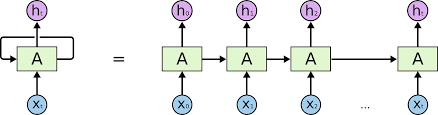

이 그림을 보면, x는 입력값, h는 결과값이다.  

A의 결과는 다시 A로 들어가서 루프를 만들어준다. 이렇기에 현재의 상태가 그 다음 상태에 영향을 미친다. 


2.rnn의 한계  

이렇듯, rnn은 정말 멋진 놈이다.  

하지만, rnn은 기억을 가지고 있다는 점이 장점이지만  

장기 기억에는 취약하다는 문제가 있다. 이를 장기 의존 관계(Long-Term-Dependency)라고 한다.  

사람으로 치면 단기 기억력은 좋은데, 장기 기억력은 좋지 않은 것이다.  

이를 해결하기 위한 것이 바로 lstm이다.


3.lstm이란?
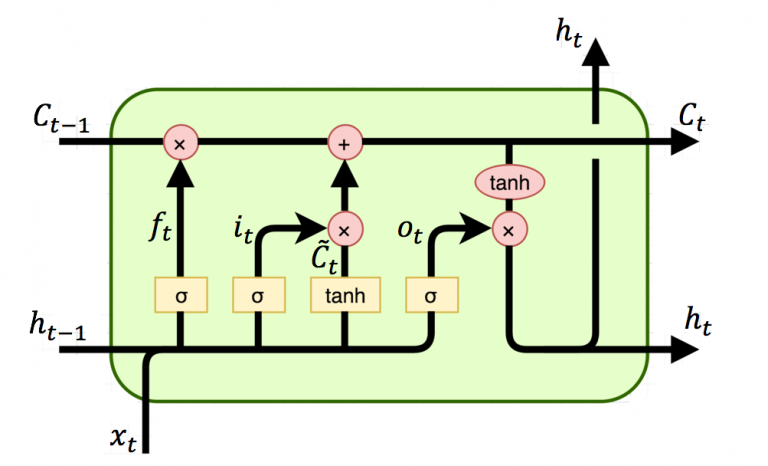


lstm은 rnn의 한 종류로, 긴 의존 기간의 문제를 피하기 위해 명시적으로 설계된 모델이다.

일반적인 rnn은 장기 의존에 관해 문제를 해결하기 어려운데,

lstm은 게이트 메커니즘을 활용해서 정보를 보존하고 전달함으로서 장기 의존성을 효과적으로 학습할 수 있다.

또한 rnn은 역전파 과정에서 기울기 소실 문제가 발생할 수 있으나, 긴 시퀀스에서는 역전파 과정 중에 기울기가 지수적으로 감소해 학습이 어려워진다.

하지만 lstm은 게이트 메커니즘을 사용해 기울기 소실 문제를 완화시킨다.

(게이트 메커니즘: 게이트는 입력 데이터와 이전 시간 단계에서의 출력을 기반으로 어떤 정보를 유지하고 어떤 정보를 제거할 지 결정한다. 이를 통해 lstm은 입력 데이터 중에서 중요한 정보를 학습하고 장기적인 의존성을 보존할 수 있다.)

이를 가능하게 하는 것이 바로 cell state이다. 이는 내부 메모리의 일종으로, 이 셀 상태는 시간이 지나도 정보를 계속 유지할 수 있어서 장기 의존성을

이러한 특성으로 인해 lstm은 주식 데이터 예측, 챗봇 생성 등에 사용된다. 학습하는데 도움이 된다.

In [30]:
# LSTM 모델 정의 및 학습
def train_lstm(data, max_seq_length, num_features):
    tokenizer = Tokenizer() #텍스트 데이터를 토큰화한다.
    tokenizer.fit_on_texts(data) #텍스트 데이터를 토크나이저에 맞춰 단어 인덱스를 구축한다.
    X = tokenizer.texts_to_sequences(data) #텍스트 데이터를 정수 시퀀스로 변환한다.
    X = pad_sequences(X, maxlen=max_seq_length)  # 시퀀스의 최대 길이로 패딩
### lstm 모델 정의
    model = Sequential() #순차적인 모델을 생성한다.
    model.add(LSTM(128, input_shape=(max_seq_length, 1)))  # lstm 레이어를 추가한다. 128은 lstm의 유닛 수를 의미하고, input_shape은 입력 데이터의 형태를 정의한다.
    model.add(Dense(max_seq_length))  # 출력 레이어 수정

    model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy']) #손실함수, 최적화 알고리즘, 평가 지표를 정의한다. 
    history =model.fit(X[:, :, None], X, epochs=200, batch_size=64)  # 데이터를 3D 텐서로 변환하여 입력한다. 이는 데이터를 맞추지 않으면 오류가 나기 때문이다. 

    #이 함수는 밑에 정의되어 있다.(순서에 맞게 설명하기 위해)
    plot_history(history)
    #epochs는 모델 학습의 수이다. batch_size는 배치 크기를 64로 설정하는 것이다. 
    return model, tokenizer #학습된 모델과 토크나이저를 반환한다.


### 6.2. lstm모델에 대한 자세한 설명

위 함수는 주어진 텍스트 데이터를 시퀀스로 변환하고, 이를 사용해서 lstm 모델을 학습시키는 함수이다.
모델은 시퀀스 예측을 위해 설계가 되었다. 입력 시퀀스를 받아 예측된 시퀀스를 출력하도록 설정되었다.
lstm 레이어는 시퀀스 데이터를 처리하고, dense는 출력 차원을 맞추는 역활을 한다.


손실 함수는 모델이 학습하는 동안 예측의 품질을 측정하는 함수이다.
손실함수의 값이 작을 수록 모델의 예측이 실제 값에 가까워진다.
회귀 문제(예측 하고자 하는 타겟값이 숫자인 경우이다. 현실에서 많이 보이는 문제이다. 예:직원들의 성과를 기반으로 하는 연봉 추이를 얻음.)
에서는 주로 mse를 사용하고, 
분류 문제에는 cross-entropy-loss을 사용한다. 


최적화 알고리즘은 손실 함수를 최소화하기 위해 모델의 가중치(모델이 데이터를 학습해서 예측을 할 수 있도록 조정하는 값)를 조정하는 방법을 제공한다. 
최적화 알고리즘은 손실 함수의 그라디언트(미분값/경사 하강법 알고리즘을 통해 계산된다.)를 기반으로 모델의 가중치를 업데이트하여 손실을 최소화하는 방향으로 학습을 진행한다. 



## 7.코사인 유사도를 이용해서 질문과 유사한 데이터를 q배열에서 찾는 함수 정의

코사인 유사도를 이용해서 질문과 유사한 데이터를 q배열에서 찾고,
그에 맞는 a배열의 내용을 출력하는 함수를 만든다.
이는 질문을 입력하고 답변을 출력하는 과정에서 쓰인다.


In [29]:
def find_similar_answer(question, data, vectorizer, model, tokenizer):
    okt = Okt() #konlpy의 okt 사용
    question = preprocess_text(question) #질문을  okt를 사용해서 전처리한다. 
    question_vec = vectorizer.transform([question]) #질문을 TF-IDF 벡터화한다. 이를 통해 유사도를 계산할 준비를 한다. 
    question_seq = tokenizer.texts_to_sequences([question])# 질문을 시퀀스로 변환한다.
    question_seq = pad_sequences(question_seq)# 패딩 처리.

    max_sim = -1 
    most_similar_answer = None #가장 유사한 답변을 담을 변수를 초기화한다. 

    for i, qa in enumerate(data): #qa 배열을 data에 받는다. data는 q도 있고, a도 있기 때문에, enumerate을 통해 받는다. 
        q = qa['Q'] #qa배열에서 현재의 질문을 추출한다. 
        q_vec = vectorizer.transform([preprocess_text(q)])  # 질문을 전처리한 뒤, TF-IDF 벡터화한다.
        sim = cosine_similarity(question_vec, q_vec)[0][0] #입력 질문과 데이터 질문 사이의 코사인 유사도를 계산한다. 

        q_seq = tokenizer.texts_to_sequences([preprocess_text(q)])  # 질문 전처리한뒤, 시퀀스를 패딩한다.(데이터에 특정 값을 채워서 데이터의 크기를 조정하는 것)
        q_seq = pad_sequences(q_seq, maxlen=question_seq.shape[1]) #시퀀스를 패딩한다. shape[1]은 시퀀스의 길이를 나타낸다.

        lstm_sim = model.predict([question_seq, q_seq])  # LSTM을 통해 입력 질문 시퀀스와 데이터 질문 시퀀스 간의 유사도를 예측한다.
        avg_sim = (sim + lstm_sim) / 2  # TF-IDF와 LSTM 유사도의 평균을 계산한다.

        # numpy 배열로 비교
        if np.any(avg_sim > max_sim): #np.any는 조건을 만족하는지 확인한다.
            max_sim = avg_sim #지금 유사도가 기존의 max_sim보다 크면 값을 새로 업데이트 한다.
            most_similar_answer = qa['A'] #이에 따라 가장 유사한 답변을 업데이트 한다.

    return most_similar_answer

### 7.1. 함수 보충설명

7.1.1.TF-IDF와 LSTM 유사도의 평균을 계산하는 의미

TF-IDF와 LSTM 모델이 각각 다른 방법으로 유사도를 계산하기 때문에, 두 가지 방법을 모두 고려해서 질문에 대한 답변을 찾기 위해 두 값의 평균을 사용하는 것이다.

7.1.2.[0][0]을 코사인 유사도에서 선택하는 의미

cosine_similarity(question_vec, q_vec)의 출력 결과는 다음과 같이 나타난다.(예시)

[[0.96880258 0.90731863]]

첫번째 부분은 q배열과 q_vec간의 유사도, 두번째는 a배열과 q_vec간의 유사도를 나타낸다.

즉, q(질문) 배열과 직접 입력한 질문과의 유사도를 출력하는 것이다.

## 8.lstm 모델 학습 

lstm 모델을 학습한다.

특이한 점은 

qa배열의 실제 데이터에 따라 모델의 변수를 정의한다는 것이다. (num_features,max_seq_length)

Epoch 1/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.0000e+00 - loss: 1066.0654
Epoch 2/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.0526 - loss: 1061.7010
Epoch 3/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step - accuracy: 0.0789 - loss: 1057.3999
Epoch 4/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.0789 - loss: 1053.1381
Epoch 5/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.0789 - loss: 1048.8951
Epoch 6/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.2105 - loss: 1044.6589
Epoch 7/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.3947 - loss: 1040.4203
Epoch 8/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.3684 - loss: 1036.1716
Epoch 9/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.3947 - loss: 1031.9052
Epoch 10/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.3684 - loss: 1027.6124
Epoch 11/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.3684 - loss: 1023.2865
Epoch 12/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0

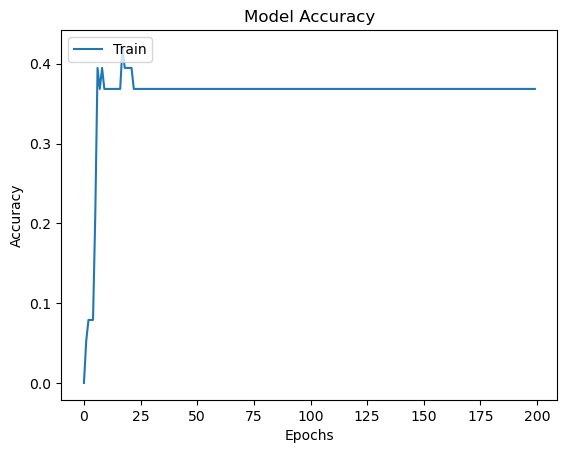

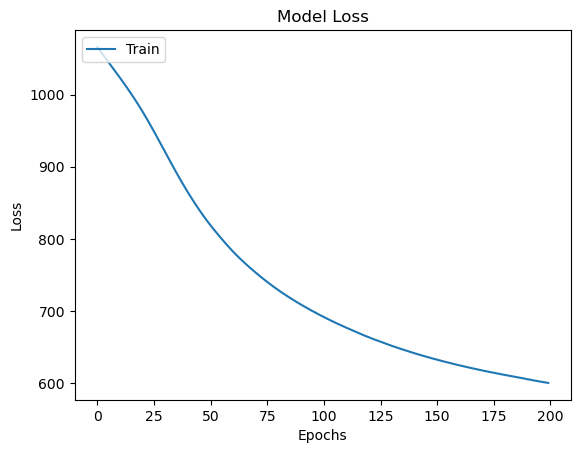

In [31]:
# 데이터 로드 및 전처리
questions = [qa['Q'] for qa in organized_data]  # 질문만 추출한다.

# 질문들을 okt를 사용해서 전처리하여 TF-IDF 벡터화한다.
processed_questions = [preprocess_text(q) for q in questions]
vectorizer = TfidfVectorizer() #TfidfVectorizer 정의
X = vectorizer.fit_transform(processed_questions)
num_features = X.shape[1]  # TF-IDF 벡터화된 데이터의 피처 수. qa배열의 실제 데이터에 따라 모델의 변수를 정의한다. 

# 최대 시퀀스 길이 계산
max_seq_length = max([len(q.split()) for q in processed_questions])

# LSTM 모델 학습
lstm_model, tokenizer = train_lstm(processed_questions, max_seq_length, num_features)

## 9.matplotlib을 이용해 정확도/loss에 대한 시각화

시각화를 통해 머신러닝의 정확도,loss에 대한 시각화를 쉽게 할 수 있다.
아래 함수 덕분에, 머신 러닝이 완료되면 정확도/loss에 대한 시각화 그래프를 볼 수 있다.


In [27]:
def plot_history(history):
    # 정확도 그래프
    plt.plot(history.history['accuracy'])
    plt.title('Model Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend(['Train'], loc='upper left')
    plt.show()

    # 손실 그래프
    plt.plot(history.history['loss'])
    plt.title('Model Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend(['Train'], loc='upper left')
    plt.show()

## 10. 질문생성/답변 출력

위에서 정의됐던 함수,학습되었던 머신러닝을 통해 질문을 생성하고 답변을 출력한다.

In [33]:
# 사용자 입력 받기
user_question = input('질문을 입력하세요: ')

# 유사한 답변 찾기
answer = find_similar_answer(user_question, organized_data, vectorizer, lstm_model, tokenizer)
print("답변:", answer)

질문을 입력하세요:  자격루


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━

## 12. 말투 개선

실제 세종대왕과 대화하는 것처럼 말투를 개선한다.

## 13.모델 정확도 개선 과정

## 14. 추후 모델 개선 계획